see http://lab.ndl.go.jp/cms/hiragana73
```console
$ wget http://lab.ndl.go.jp/dataset/hiragana73.tar.gz
$ tar xfz hiragana73.tar.gz
$ wget http://lab.ndl.go.jp/dataset/example/train_ndlkana.tar.gz
$ tar xfz train_ndlkana.tar.gz
```

In [2]:
!python3 -m pip install Pillow

    100% |################################| 2.0MB 4.0MB/s ta 0:00:011


In [4]:
%run -i example/ndlkana/train.py -d hiragana73

Namespace(batchsize=100, datadir='hiragana73', epoch=20, fspec='*.png', initmodel='', resume='', testratio=0.14285714285714285)
load NDLKANA dataset
n_train=68597 n_test=11403
n_class=73
epoch 1
graph generated
train mean loss=0.57483, accuracy=0.86960, throughput=2499.3 images/sec
test  mean loss=0.13620, accuracy=0.96659
epoch 2
train mean loss=0.11068, accuracy=0.97082, throughput=2439.0 images/sec
test  mean loss=0.11671, accuracy=0.96843
epoch 3
train mean loss=0.07604, accuracy=0.97809, throughput=2532.6 images/sec
test  mean loss=0.09048, accuracy=0.97431
epoch 4
train mean loss=0.05962, accuracy=0.98230, throughput=2382.0 images/sec
test  mean loss=0.07687, accuracy=0.97965
epoch 5
train mean loss=0.04886, accuracy=0.98494, throughput=2411.1 images/sec
test  mean loss=0.07766, accuracy=0.97948
epoch 6
train mean loss=0.04127, accuracy=0.98668, throughput=2442.6 images/sec
test  mean loss=0.06493, accuracy=0.98158
epoch 7
train mean loss=0.03590, accuracy=0.98824, throughput=240

In [5]:
from pathlib import Path
import sys
sys.path.append(str(Path('./example/ndlkana').absolute()))
import net
import data

import numpy as np
import random
from PIL import Image

import chainer
import chainer.links as L
from chainer import serializers

In [6]:
# Prepare dataset
print('load NDLKANA dataset')
ndlkana = data.load_ndlkana_data('hiragana73', '*.png', 1.0/7.0)
ndlkana['data'] = ndlkana['data'].astype(np.float32)
ndlkana['data'] /= 255
n_test = ndlkana['testsize']
n_train = ndlkana['data'].shape[0] - n_test
print("n_train={} n_test={}".format(n_train, n_test))

_, x_test = np.split(ndlkana['data'], [n_train])

# Prepare CNN model, defined in net.py
model = L.Classifier(net.NdlkanaCNN())
serializers.load_npz('hiragana73.model', model)

load NDLKANA dataset
n_train=68597 n_test=11403


--画像


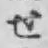

--候補一位の文字
せ
--候補ぜんぶ（ラベルのインデックス）
[21 22 51 66 40 25 33 50 59 37 36  9 31  4 42 63 28 19 71 39 11 18 61 34 72
 64  0 16 35 60 14 48 32 38  7 26 58 57  6 53 70  1 41 44 49 17 13  3 15 56
 52 27  5  8 29 10 23 24 43 45 68 47 65 67 62 55 30  2 54 20 46 69 12]
--確率ぜんぶ
[  7.39292622   0.80466545   0.5365994   -2.02391601  -2.12653828
  -2.44498348  -2.61160302  -3.17728567  -4.87509871  -5.18633127
  -5.77648926  -5.90091658  -7.84125566  -7.89595032  -8.23139668
  -8.379076    -8.40882969  -8.57416248  -8.83006859  -9.06515026
  -9.61909008  -9.74232578 -10.18440247 -10.19537926 -10.39629555
 -10.53983307 -10.58770752 -10.98420334 -11.07983494 -11.25813293
 -11.76102638 -11.86397743 -11.97500134 -11.98637295 -12.34544277
 -12.57084084 -12.58101082 -12.59549904 -12.79733276 -12.8950882
 -13.12607479 -13.21101952 -13.55077934 -13.6707716  -13.68242836
 -14.06533813 -14.11181068 -14.27572346 -14.33026981 -14.49097729
 -14.53163624 -14.62358761 -14.70830154 -14.91421604 -15.22727203
 -15.2855052

In [43]:
# 推測の対象画像をランダム選択
i = random.randrange(n_test)
img = x_test[i:i + 1]
print('--画像')
display(Image.fromarray(np.uint8(img[0][0]*255)))

# 推測
x = chainer.Variable(np.asarray(img))
with chainer.using_config('train', False):
    y = model.predictor(x)
hexcode = ndlkana['label'][y.data[0].argmax()]
print('--候補一位の文字')
print(chr(int(hexcode.replace('U', '0x'), 16)))

print('--候補ぜんぶ（ラベルのインデックス）')
print(np.argsort(y.data[0])[-1::-1])
print('--確率ぜんぶ')
print(np.sort(y.data[0])[-1::-1])

In [44]:
i

3462